In [2]:
import spacy
import os
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def load_articles(directory):
    articles = []
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            with open(os.path.join(directory, filename), "r", encoding="utf-8") as file:
                content = file.read()
                articles.append(content)
    return articles

def perform_ner(articles):
    nlp = spacy.load("en_core_web_sm")
    entities = []
    entity_labels = []
    
    for article in articles:
        doc = nlp(article)
        for ent in doc.ents:
            entities.append(ent.text)
            entity_labels.append(ent.label_)
    
    return entities, entity_labels

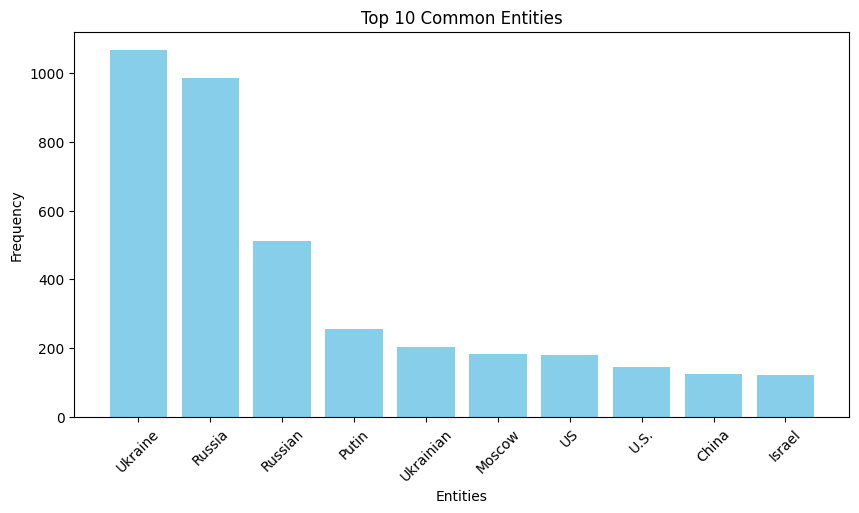

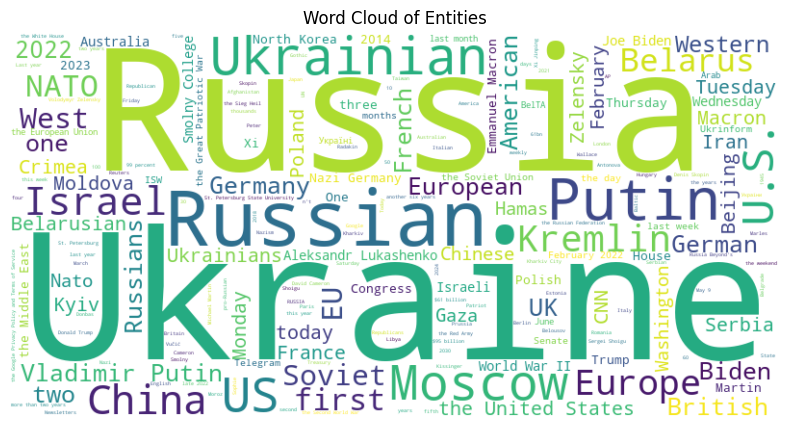

: 

In [3]:
def visualize_entities(entities, entity_labels):
    # Frequency of entities
    entity_freq = Counter(entities)
    label_freq = Counter(entity_labels)
    
    # Plotting the most common entities
    most_common_entities = entity_freq.most_common(10)
    names = [entity[0] for entity in most_common_entities]
    values = [entity[1] for entity in most_common_entities]
    
    plt.figure(figsize=(10, 5))
    plt.bar(names, values, color='skyblue')
    plt.xlabel('Entities')
    plt.ylabel('Frequency')
    plt.title('Top 10 Common Entities')
    plt.xticks(rotation=45)
    plt.show()

    # Word Cloud for entities
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(entity_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Entities')
    plt.show()

# Main execution logic
articles_dir = "../data/articles/"
articles = load_articles(articles_dir)
entities, entity_labels = perform_ner(articles)
visualize_entities(entities, entity_labels)